In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from math import cos, sin
from skimage.draw import polygon2mask
#from google.colab.patches import cv2_imshow

In [ ]:
img_path = ''
img = cv.imread(img_path)

In [ ]:
h = img.shape[0]
w = img.shape[1]
img.shape

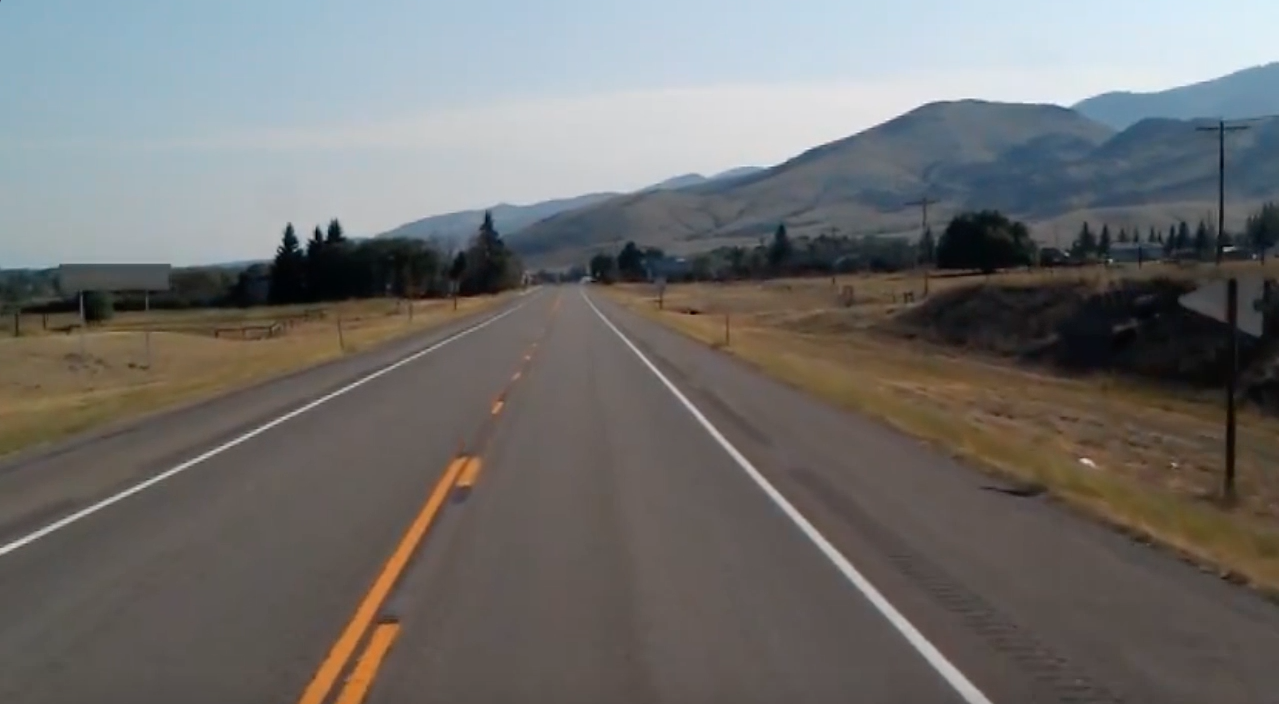

In [ ]:
cv.imshow(img)

In [ ]:
smoothing = cv.medianBlur(img, 11)

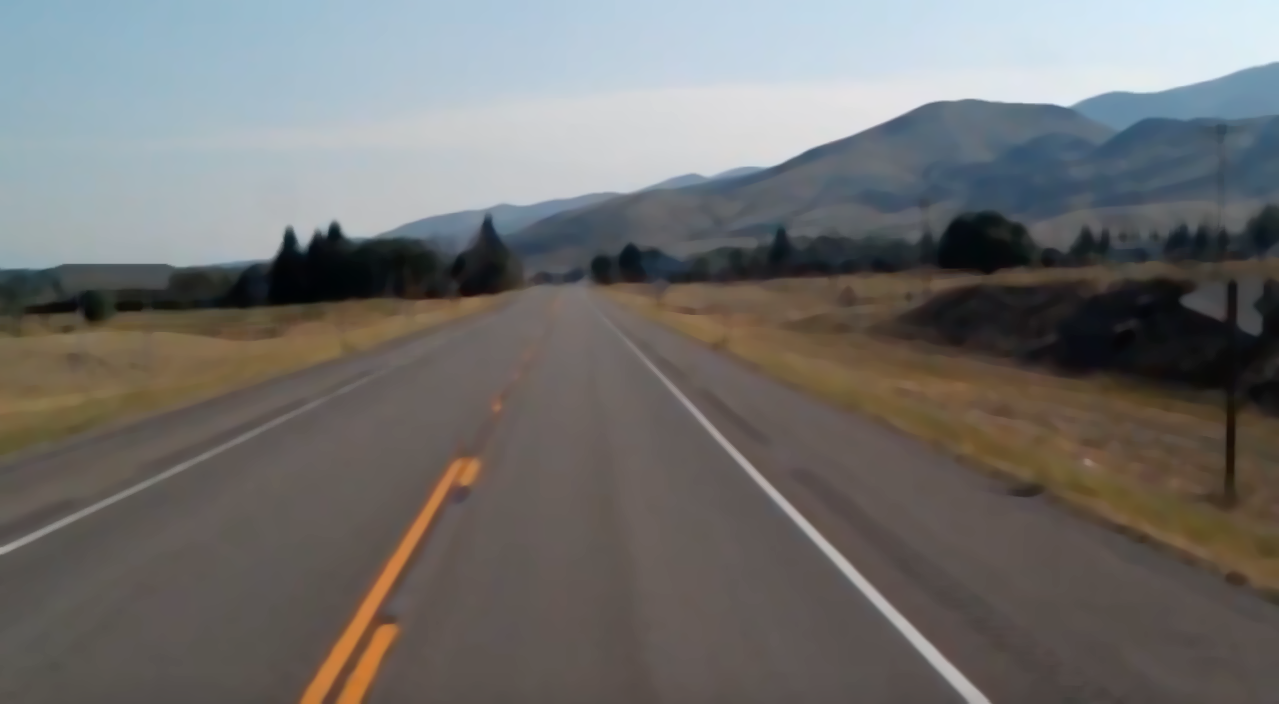

In [ ]:
cv.imshow(smoothing)

In [ ]:
lower_th = 0
higher_th = 250
edge_det = cv.Canny(smoothing, lower_th, higher_th)

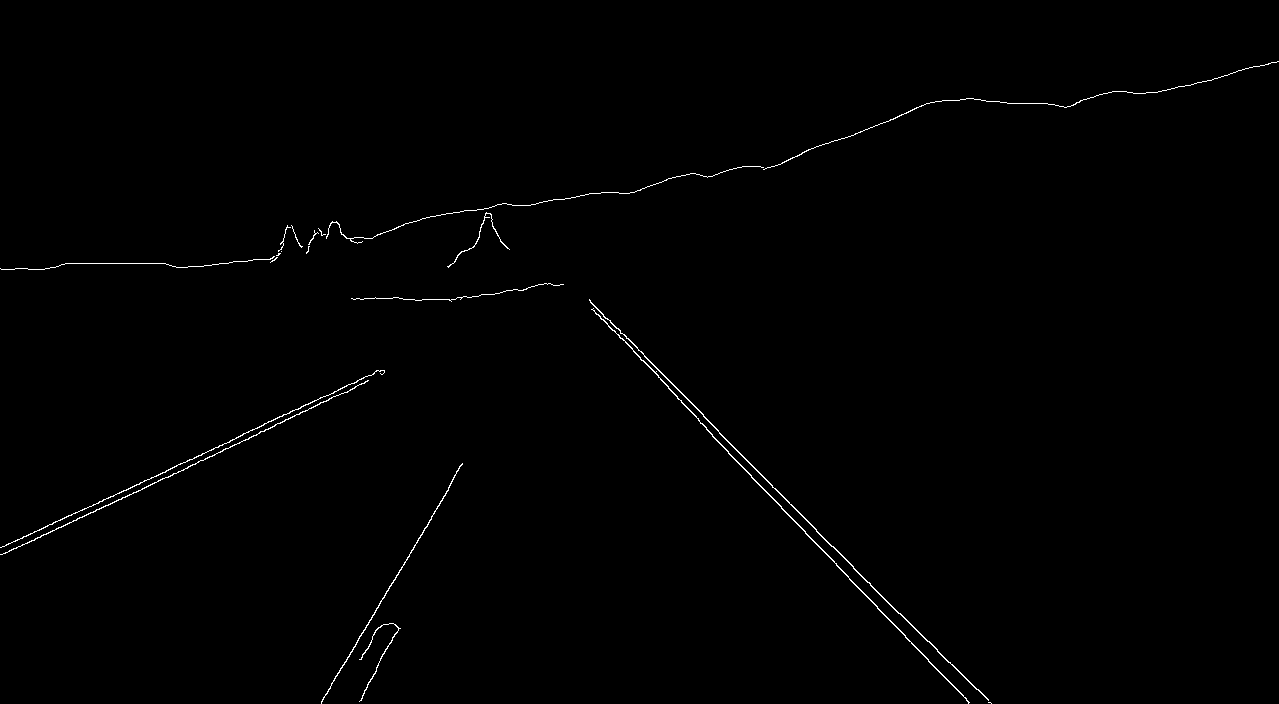

In [ ]:
cv2_imshow(edge_det)

In [ ]:
image_shape = (h, w)
polygon = np.array([[400, 0], [400, 1279], [704, 1279], [704, 0]])
mask = polygon2mask(image_shape, polygon)
mask.shape


(704, 1279)

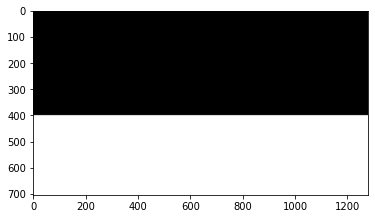

In [ ]:
plt.imshow(mask, cmap='gray')

In [ ]:
roi = edge_det * mask

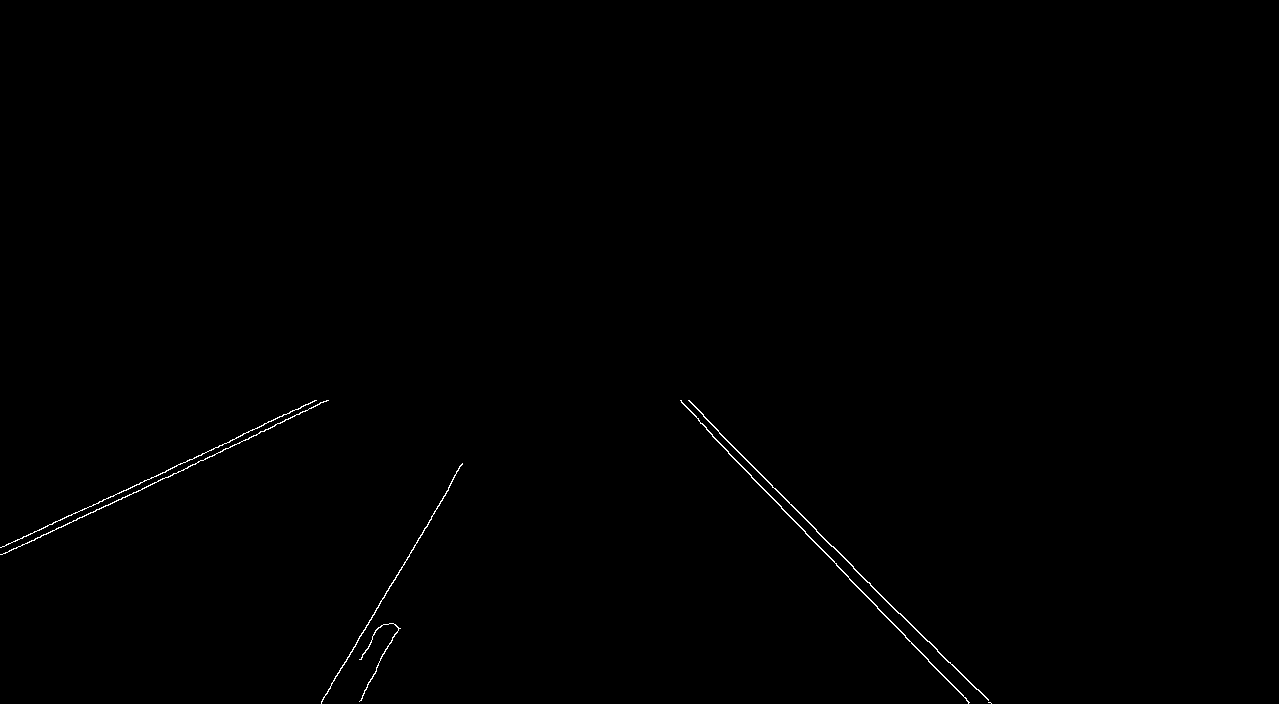

In [ ]:
cv2_imshow(roi)

In [ ]:
thetas = np.deg2rad(np.arange(0, 181))

In [ ]:
max_dist = int(np.round(np.sqrt(w**2 + h ** 2)))

In [ ]:
rs = np.linspace(-max_dist, max_dist, 2*max_dist)
acc = np.zeros((2 * max_dist, 181))

In [ ]:
c = 0
for x in range(w):
  for y in range(h):
    pixel = roi.item(y, x)
    if pixel > 0:
      for theta in range(181):
        rho = int(x * cos(theta) + y * sin(theta))
        acc[rho + max_dist,theta] += 1


In [ ]:
def get_max_para(li):
  idx = np.argmax(acc)
  rho = int(rs[int(idx / acc.shape[1])])
  theta = np.rad2deg(thetas[int(idx % acc.shape[1])])
  return rho, theta, idx

In [ ]:
lines = []
for i in range(70):
  l = get_max_para(acc)
  acc[int(l[-1] / acc.shape[1])][int(l[-1] % acc.shape[1])] = 0
  lines.append(l)

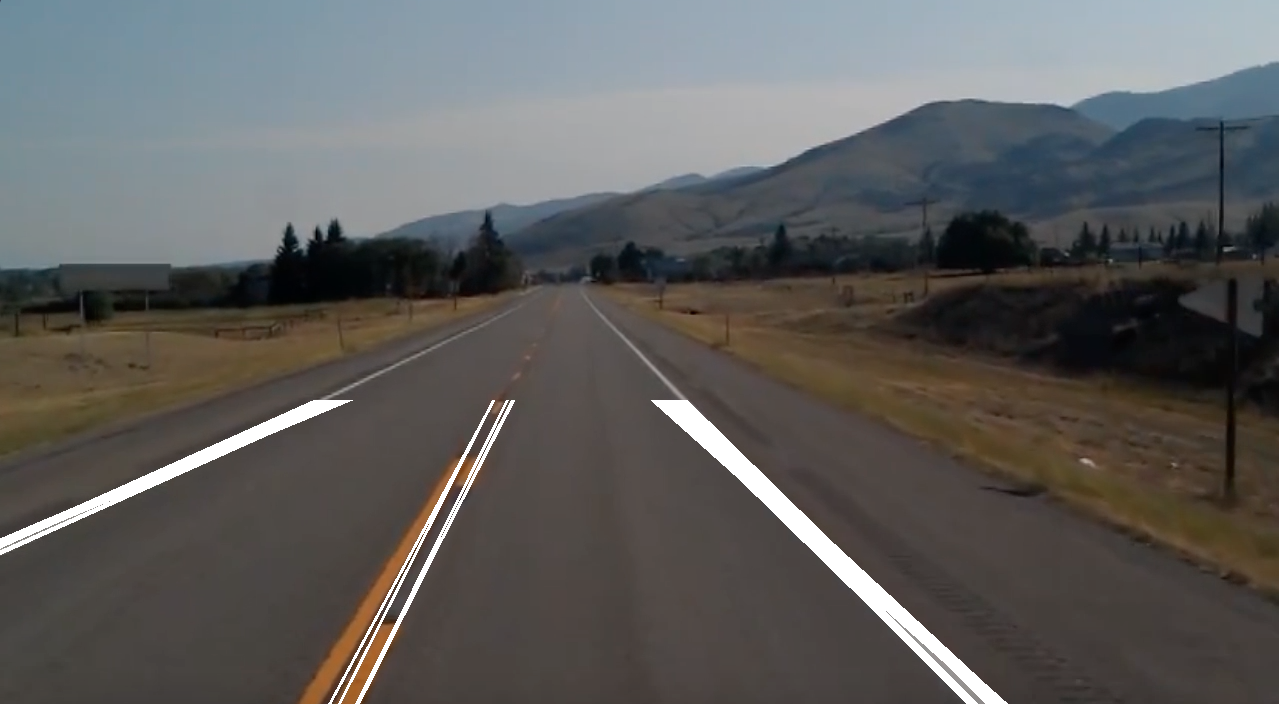

In [ ]:
imgc = np.ones((h, w), dtype='uint8')
for l in lines:
    r, theta = l[0], l[1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + max_dist * (-b))
    y1 = int(y0 + max_dist * (a))
    x2 = int(x0 - max_dist * (-b))
    y2 = int(y0 - max_dist* (a))
    cv.line(imgc, (x1, y1), (x2, y2), (255, 255, 255), 2)
 
nmask = imgc * mask
mask_image = np.zeros((h, w, 3), np.uint8)
mask_image[:,:,0] = nmask
mask_image[:,:,1] = nmask
mask_image[:,:,2] = nmask
out = cv.addWeighted(img, 0.8, mask_image, 0.9,0)

cv2_imshow(out)

In [ ]:
unique, counts = np.unique(roi, return_counts=True)
countl = counts[1]

In [ ]:
thetasl = 100 
thetas = np.deg2rad(np.linspace(0, 10, thetasl))

In [ ]:
arr = [[0 for i in range(thetasl)] for j in range(countl)]


In [ ]:
c = 0
for x in range(w):
  for y in range(h):
    pixel = roi.item(y, x)
    if pixel > 0:
      for theta in range(thetasl):
        rho = int(x * cos(theta/10) + y * sin(theta/10))
        arr[c][theta] = rho
      c += 1

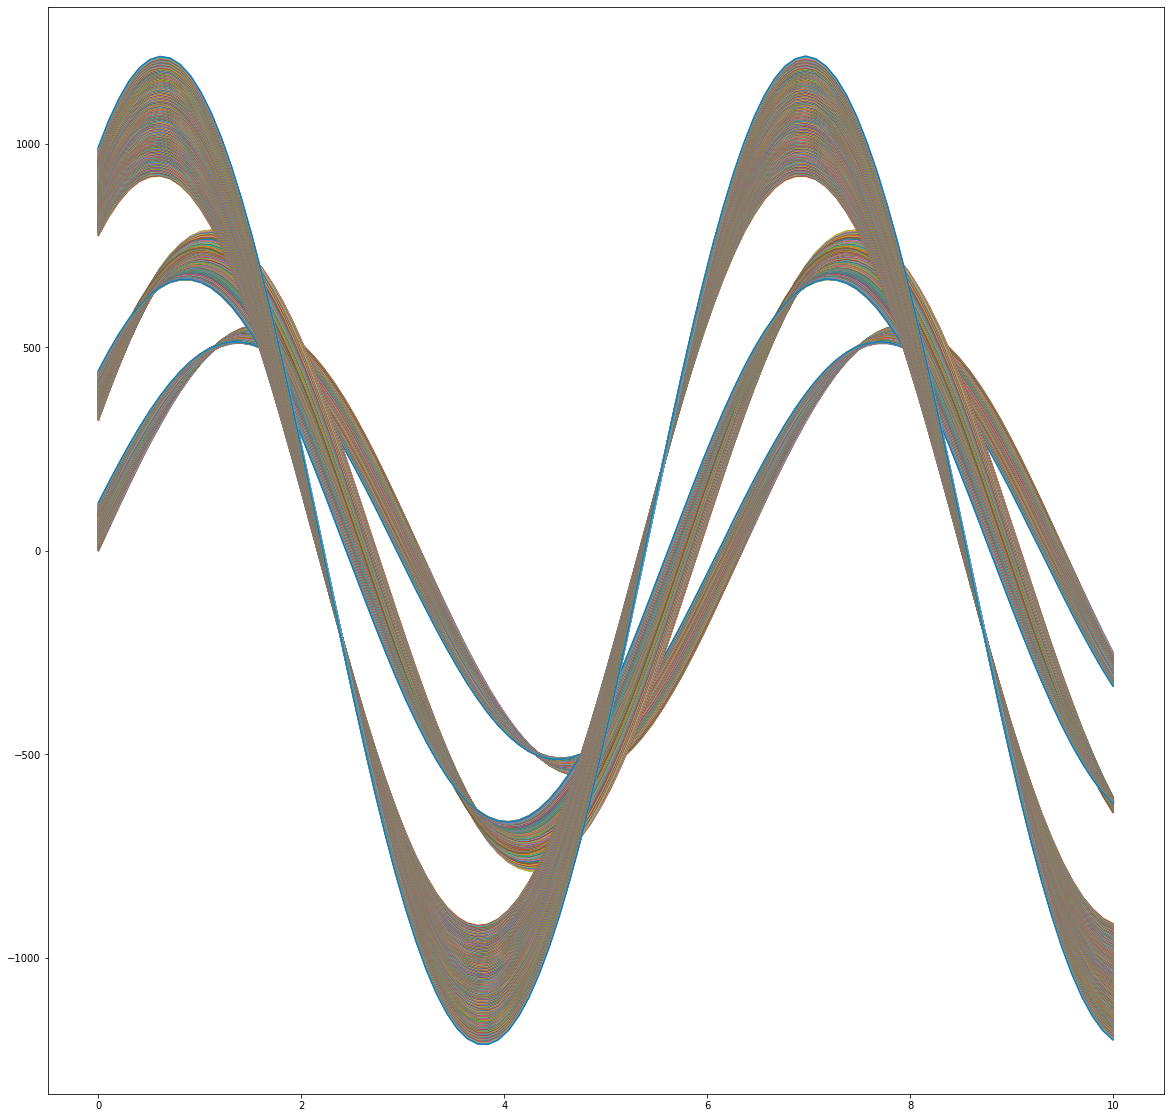

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 20))
for i in range(countl):
  plt.plot(np.rad2deg(thetas), arr[i])

plt.show()